In [1]:
import numpy as np
import math, json
from rdp import rdp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import tqdm.notebook as tq
import pickle
from collections import defaultdict
import cairosvg
from PIL import Image,ImageDraw
import glob
import os 
import re

In /home/esp1/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/esp1/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/esp1/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/esp1/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/esp1/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

In [2]:
def get_bounds(data):
    minx, miny = 600, 600  
    maxx, maxy = 0, 0
    
    for i, (x, y, z) in enumerate(data): 
        if minx > x:
            minx = x
        if miny > y:
            miny = y 

        if maxx < x:
            maxx = x
        if maxy < y:
            maxy = y 
    return minx, maxx, miny, maxy

In [27]:
def convert_3d(drawing, return_flag = False, threshold=50):
    out = []
    corrupted = False
    for item in drawing:
        char = list(item.keys())[0]
        stroke = item[char]
        if len(stroke) == 1:
            x, y = stroke[0]
            out.append([x, y, 0])
            out.append([x+5, y+5, 1])
            continue
        segment = []
        for i, point in enumerate(stroke):
            x, y = point 
            if i == len(stroke) - 1:
                segment.append([x, y, 1])
            else:
                segment.append([x, y, 0])
        
        start = 0 
        for i, point in enumerate(segment):
            if i < len(segment) -1:
                x, y, _ = point
                next_x, next_y, _ = segment[i+1]
                if any((
                    abs(x-next_x)>threshold,
                    abs(y-next_y>threshold),
                )):
                    corrupted=True
                    start = i +1
        
        out += segment[start:]
    if return_flag:
        return out, corrupted
    return out

In [4]:
def make_square(im, min_size=256, fill_color=(255, 255, 255)):
    x, y = im.size
    size = max(min_size, x, y)
    new_im = Image.new('RGBA', (size, size), fill_color)
    new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
    return new_im

In [5]:
def draw_strokes(data, factor=1, svg_filename = 'tmp/sample.svg', stroke_width = 3, square = False, return_res = False):
    min_x, max_x, min_y, max_y = get_bounds(data)
    dims = (50 + max_x - min_x, 50 + max_y - min_y)
    dwg = svgwrite.Drawing(svg_filename, size = dims)
    dwg.add(dwg.rect(insert=(0, 0), size=dims,fill='white'))
    lift_pen = 1
    abs_x = 25 - min_x 
    abs_y = 25 - min_y
    p = "M%s,%s " % (abs_x, abs_y)
    command = "M"
    for i in range(len(data)):
        if (lift_pen == 1):
            command = "M"
        elif (command != "L"):
            command = "L"
        else:
            command = ""
        x = float(data[i][0]) - min_x
        y = float(data[i][1]) - min_y
        lift_pen = data[i][2]
        p += command+str(x)+" "+str(y)+" "
    the_color = "black"
    
    dwg.add(dwg.path(p).stroke(the_color,stroke_width).fill("none"))
    dwg.save()
    cairosvg.svg2png(url="tmp/sample.svg", write_to="tmp/sample.png")
    img = Image.open('tmp/sample.png')
    if square:
        img = make_square(img)
    if return_res:
        return img, dims 
    else:
        return img

In [6]:
npy_files = glob.glob('server/larger_data/*')
file = np.random.choice(npy_files)

In [7]:
file = 'server/larger_data/1فسبحان الله حين تمسون وحين تصبحون.json'

server/larger_data/وكلهم اتيه يوم القيامة فردا.json


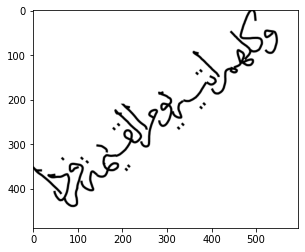

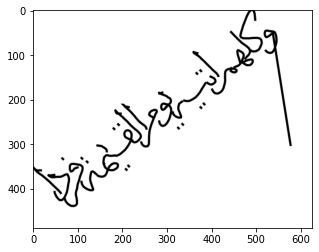

server/larger_data/2محمد.json


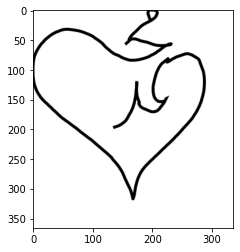

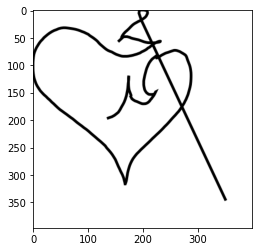

server/larger_data/2صلى الله عليه وسلم.json


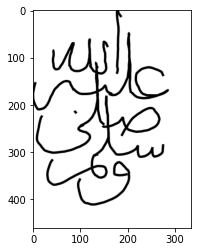

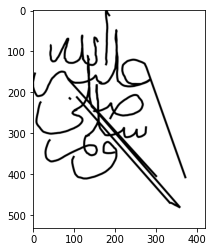

server/larger_data/قال إني اعلم مالا تعلمون.json


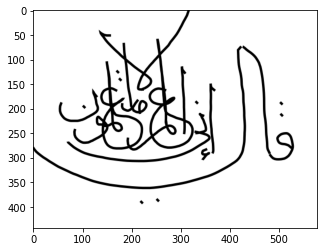

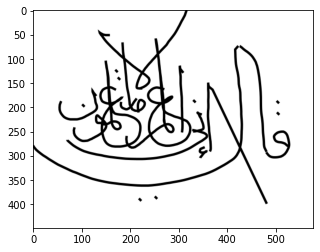

server/larger_data/1رمضان كريم.json


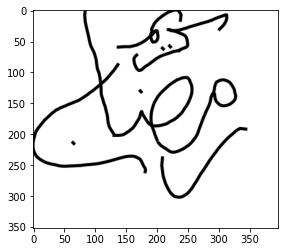

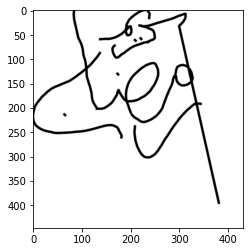

server/larger_data/2الله أكبر.json


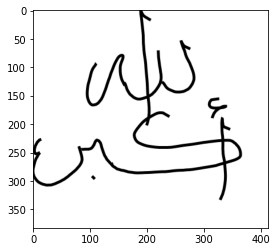

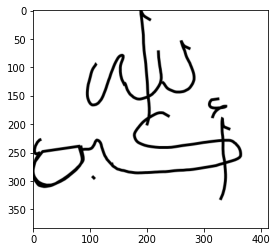

server/larger_data/ولعل ما ترجون سوف يكون.json


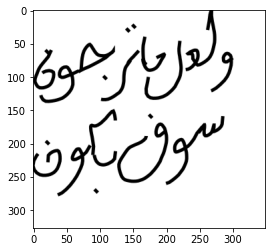

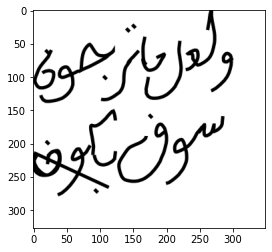

server/larger_data/خيركم من تعلم القران و علمه.json


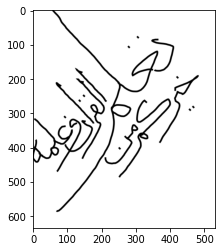

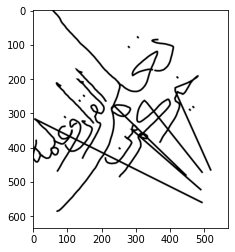

server/larger_data/مسجد الفتاح العليم.json


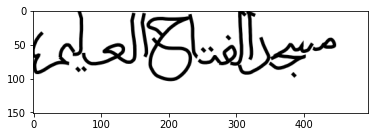

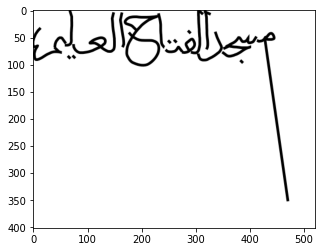

server/larger_data/الله نور السماوات والارض.json


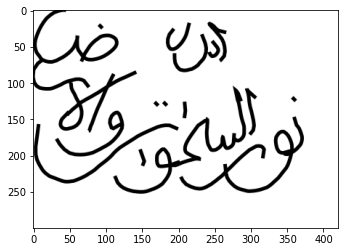

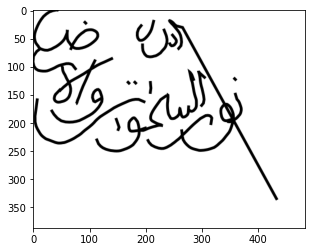

server/larger_data/أنا لست لي.json


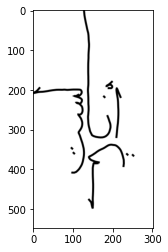

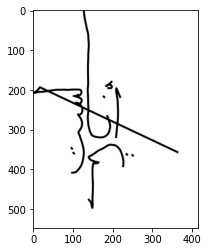

server/larger_data/خالد محمد العربي.json


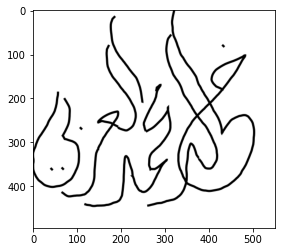

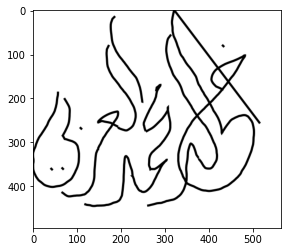

server/larger_data/ومايعلم جنود ربك إلا هو.json


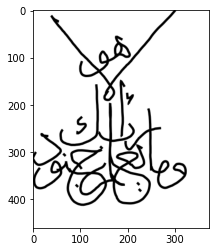

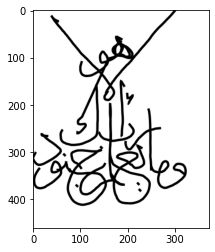

server/larger_data/1إن هذا القرآن يهدي للتي هي أقوم.json


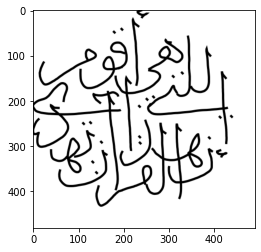

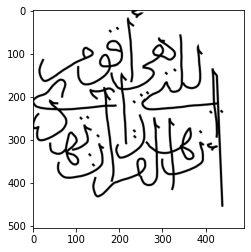

server/larger_data/11محمد رسول الله.json


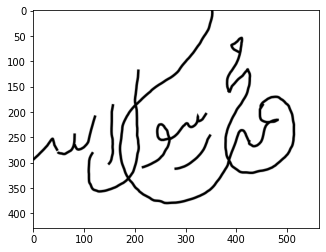

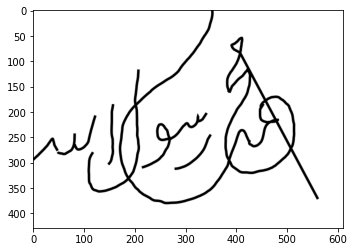

server/larger_data/وقل رب ارحمهما كما ربياني صغيرا.json


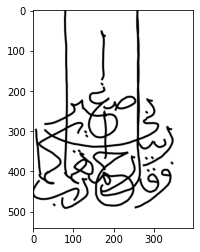

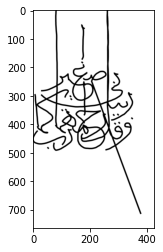

server/larger_data/الدين النصيحة.json


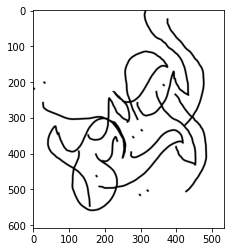

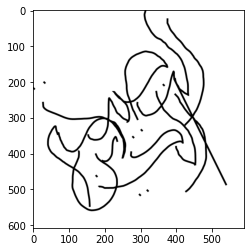

server/larger_data/لا حول ولا قوة إلا بالله العلي العظيم.json


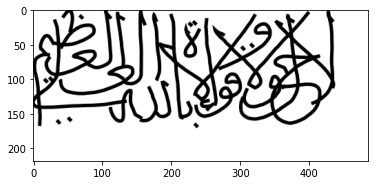

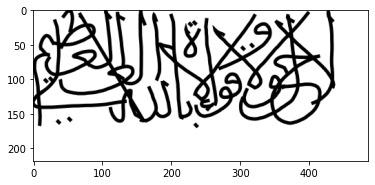

server/larger_data/إن الله مع الذين اتقوا والذين هم محسنون.json


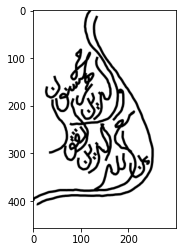

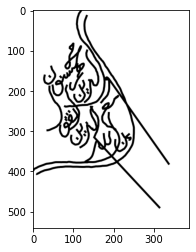

server/larger_data/28 بسم الله الرحمن الرحيم.json


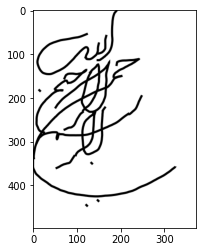

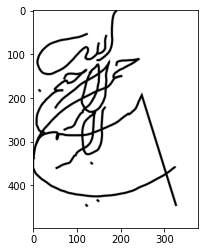

server/larger_data/وإن من شيء إلا يسبح بحمده.json


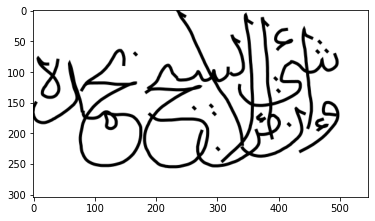

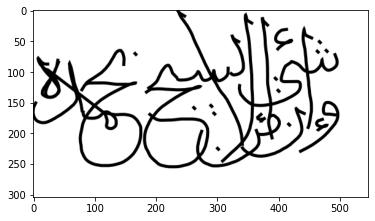

server/larger_data/23عبد الله.json


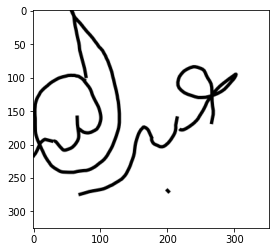

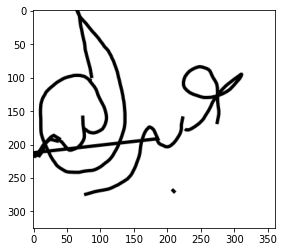

server/larger_data/1واعبد ربك حتى ياتيك اليقين.json


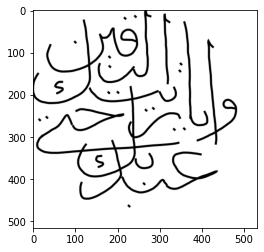

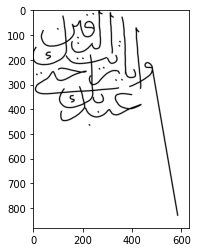

server/larger_data/أللهم افتح لي أبواب رحمتك.json


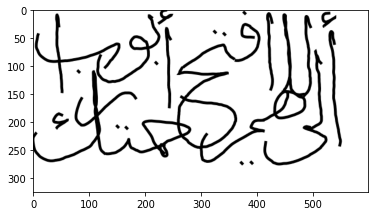

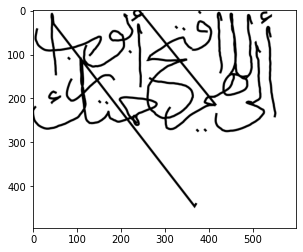

server/larger_data/ألا بذكر الله تطمئن القلوب.json


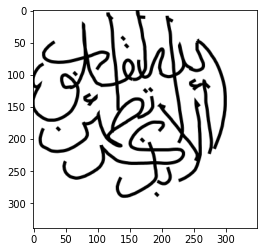

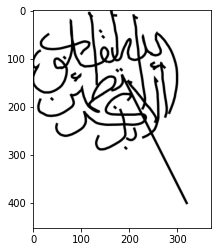

server/larger_data/فتوكل على الله.json


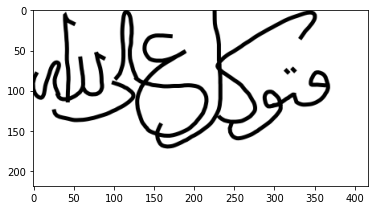

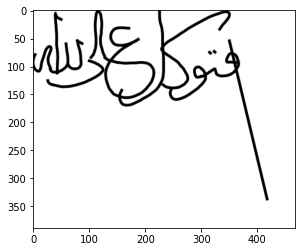

server/larger_data/الرحمن على العرش استوى.json


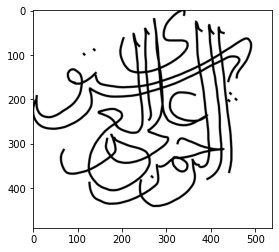

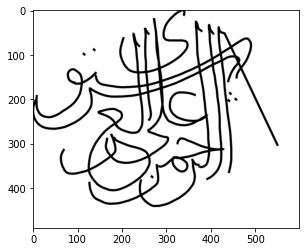

server/larger_data/2أدعوني استجب لكم.json


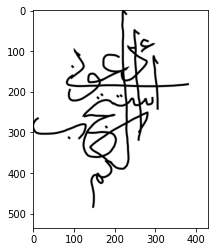

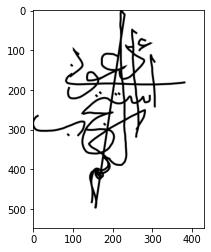

server/larger_data/115أنا اللى بكرا هبقى.json


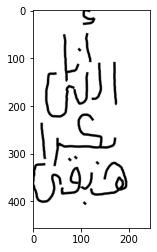

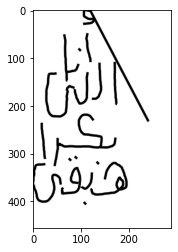

server/larger_data/23رمضان كريم.json


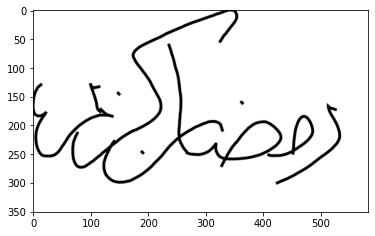

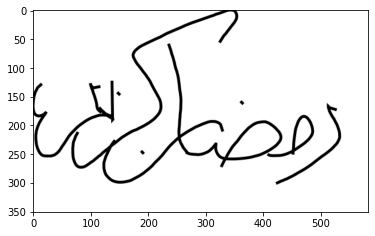

server/larger_data/حسبنا الله ونعم الوكيل.json


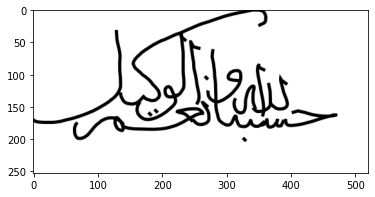

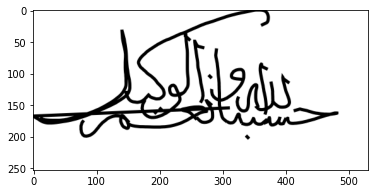

server/larger_data/فوربك لنسألنهم أجمعين.json


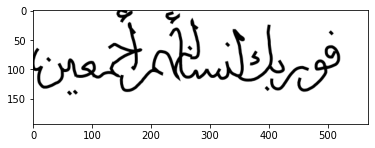

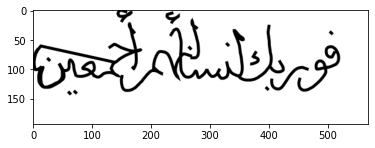

server/larger_data/1لا اله الا الله.json


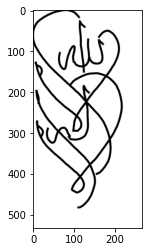

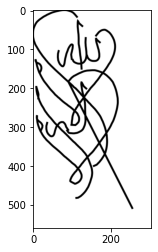

server/larger_data/اقرأ.json


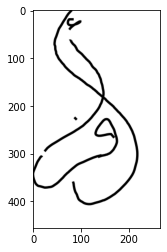

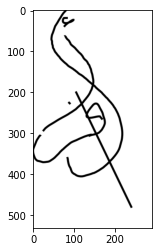

server/larger_data/1القرءان الكريم.json


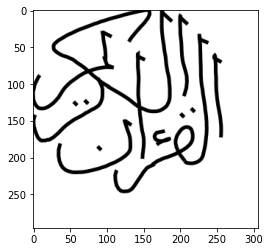

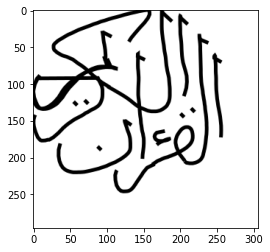

server/larger_data/الحب من شيم الكرام.json


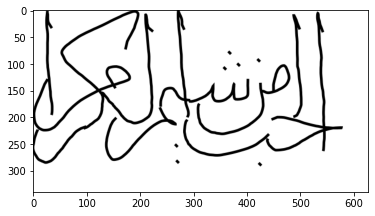

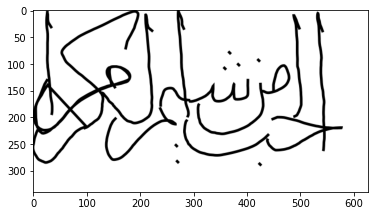

server/larger_data/ولا تنسوا الفضل بينكم.json


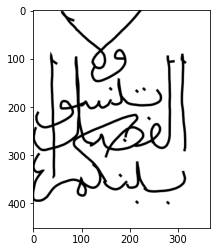

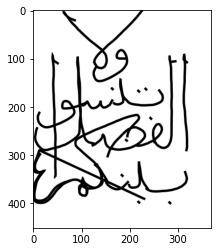

server/larger_data/7عبد الله.json


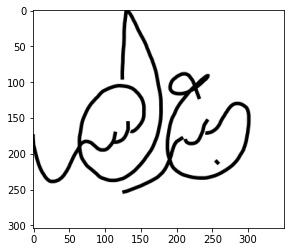

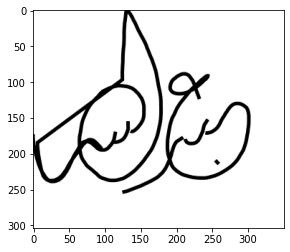

server/larger_data/على مع الحق و الحق مع العلى.json


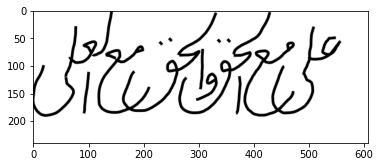

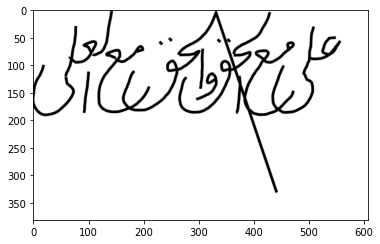

server/larger_data/ان الله جميل يحب الجمال.json


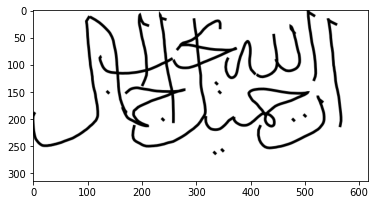

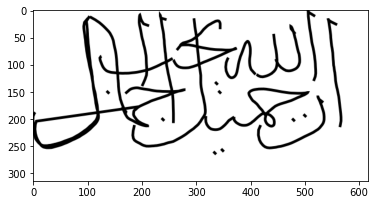

server/larger_data/4الله أكبر.json


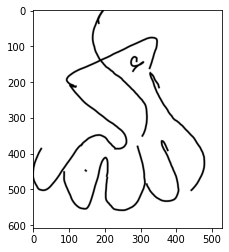

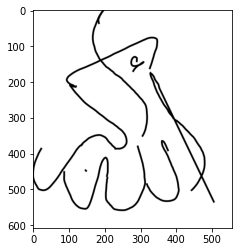

server/larger_data/ايحسب الانسان أن يترك سدى.json


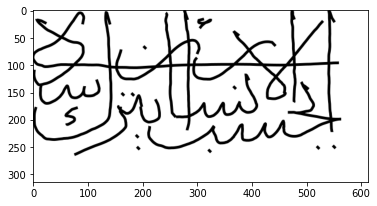

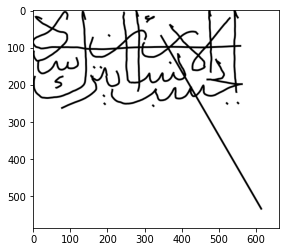

In [150]:
for f in npy_files:
    drawing = json.load(open(f))
    data1, flag = convert_3d(drawing, return_flag=True, threshold=50)
    if flag:
        print(f)
        data2, flag = convert_3d(drawing, return_flag=True, threshold=10000)
        plt.imshow(draw_strokes(data1, stroke_width = 5))
        plt.show()
        
        plt.imshow(draw_strokes(data2, stroke_width = 5))
        plt.show()

server/larger_data/1فسبحان الله حين تمسون وحين تصبحون.json


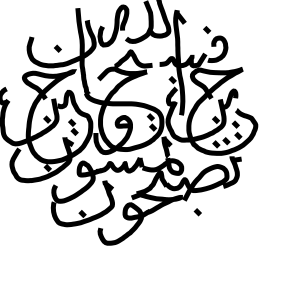

In [8]:
import glob
from IPython.display import SVG, display
import svgwrite
print(file)
num_sketches = 1 

drawing = json.load(open(file))
draw_strokes(convert_3d(drawing), stroke_width = 5)

In [9]:
def apply_rdb(drawing, verbose = 0):
    new_drawing = []
    total_prev_strokes = 0
    total_post_strokes = 0
    for item in drawing:
        char = list(item.keys())[0]
        stroke = item[char]
        processed_stroke = []
        if len(stroke):
            if verbose:
                print('processing ', char)
            post_stroke = rdp(stroke, epsilon = 2.0)
            total_post_strokes += len(post_stroke)
            total_prev_strokes += len(stroke)
        new_drawing.append({char:post_stroke})
    if verbose:
        print('reduced from ', total_prev_strokes, ' to ', total_post_strokes)
    return new_drawing

In [10]:
#https:#jrgraphix.net/r/Unicode/0600-06FF
map_chars = {
    "\u0623":["\u0621", "\u0627"], # أ
    "\u0622":["\u0605", "\u0627"], # آ
    "\u0625":["\u0627", "\u0621"], # إ
    "\u0628":["\u066E", "."], # ب
    "\u062A":[".", ".", "\u066E"], # ت
    "\u062B":[".", ".", ".", "\u066E"], # ث 
    "\u062C":["\u062D", "."], # ج
    "\u062E":[".", "\u062D"], # خ
    "\u0630":[".", "\u062F"], # ذ
    "\u0632":[".", "\u0631"], # ز
    "\u0634":[".", ".", ".", "\u0633"], # ش
    "\u0636":[".", "\u0635"], # ض
    "\u0637":["\u0627", "\uFEBB"], # ط
    "\u0638":[".", "\u0627", "\uFEBB"], # ظ
    "\u063A":[".", "\u0639"], # غ
    "\u0641":[".", "\u066F"], # ف
    "\u0642":[".", ".", "\u066F"], # ق
    "\u06A4":[".", ".", ".", "\u066F"], # ڤ
    "\u0643":["\u0621", "\u0644"], # ك
    "\u0646":[".", "\u06BA"], # ن
    "\u0624":["\u0621", "\u0648"], # ؤ
    "\u064A":["\u0649", ".", "."], #ي
    "\u0626":["\u0621", "\u0649"], #ئ
    "\u0629":[".", ".", "\u0647"], #ه
}

In [11]:
def preprocess(text):
    char_comps = []
    
    diacritics = "[ًٌٍَُِّْ]"
    numbers = '0123456789'
    for diac in diacritics: 
        text = text.replace(diac, '')

    for num in numbers: 
        text = text.replace(num, '')
    
    outText = ""
    
    for i in range(len(text)):
    
        if (text[i] == " "):
            continue
    
        if text[i] in map_chars:
            if (i < len(text) - 1 and text[i] == "\u0643"):
                if text[i+1] != ' ':
                    char_comps.append({text[i] : '\uFEDB'})
                else:
                    char_comps.append({text[i] : map_chars[text[i]]})
            else:
                char_comps.append({text[i] : map_chars[text[i]]})
        else:
                char_comps.append({text[i] : text[i]})

    return char_comps

In [12]:
def concatenate(images, mode='h', margin=10):
    widths, heights = zip(*(i.size for i in images))
    if mode =='h':
        total_width = sum(widths)
        max_height = max(heights)

        new_im = Image.new('RGB', (total_width, max_height), (255, 255, 255))

        x_offset = 0
        for im in images[::-1]:
            new_im.paste(im, (x_offset,0))
            x_offset += im.size[0]
    elif mode == 'v':    
        total_height = sum(heights)
        max_width = max(widths)

        new_im = Image.new('RGB', (max_width, total_height+margin*(len(images)-1)), (255, 255, 255))
        draw = ImageDraw.Draw(new_im)
        y_offset = 0
        for im in images:
            new_im.paste(im, (0,y_offset+margin))
            y_offset += im.size[1]
            draw.line((0,y_offset+margin-5, max_width,y_offset+margin-5), fill=(0, 0, 0), width=3)
    return new_im

In [14]:
def generate_words(file):
    word_drawings = []
    annot = file.split('/')[-1][:-5]
    annot = re.sub('[0-9]', '', annot)
    char_comps = preprocess(annot)
    indices = [m.start() - i - 1 for i, m in enumerate(re.finditer(' ', annot))]
    indices = indices + [len(annot) - len(indices)- 1]
    drawing = json.load(open(file))
#     new_drawing = apply_rdb(drawing, verbose = 0)
    i, j  = 0, 0
    c = 0
    word = ""
    for cntr, comp in enumerate(char_comps):
        char = list(comp.keys())[0]
        j += len(comp[char])
        word += char
        if cntr == indices[c]:
            word_drawings.append({word:drawing[i:i+j]})
            i = i+j
            j = 0 
            c += 1
            word = ""
    return word_drawings

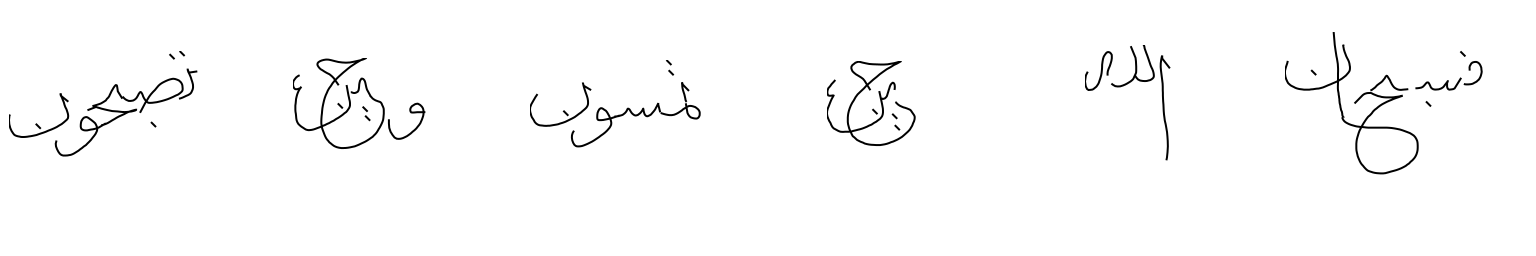

In [16]:
import re
word_drawings = generate_words(file)
images = []
for i, comp in enumerate(word_drawings):
    word, drawing = list(comp.items())[0]
    images.append(draw_strokes(convert_3d(drawing), square = True, stroke_width = 2))
concatenate(images)

In [17]:
def generate_characters(file):
    char_drawings = []
    annot = file.split('/')[-1][:-5]
    char_comps = preprocess(annot)
    drawing = json.load(open(file))
    new_drawing = apply_rdb(drawing, verbose = 0)
    i = 0 
    for comp in char_comps:
        char = list(comp.keys())[0]
        j = i + len(comp[char])
        char_drawings.append({char:new_drawing[i:j]})
        i = j 
    return char_drawings

In [18]:
import glob
npy_files = glob.glob('server/larger_data/*')
file = np.random.choice(npy_files)

server/larger_data/الحب من شيم الكرام.json


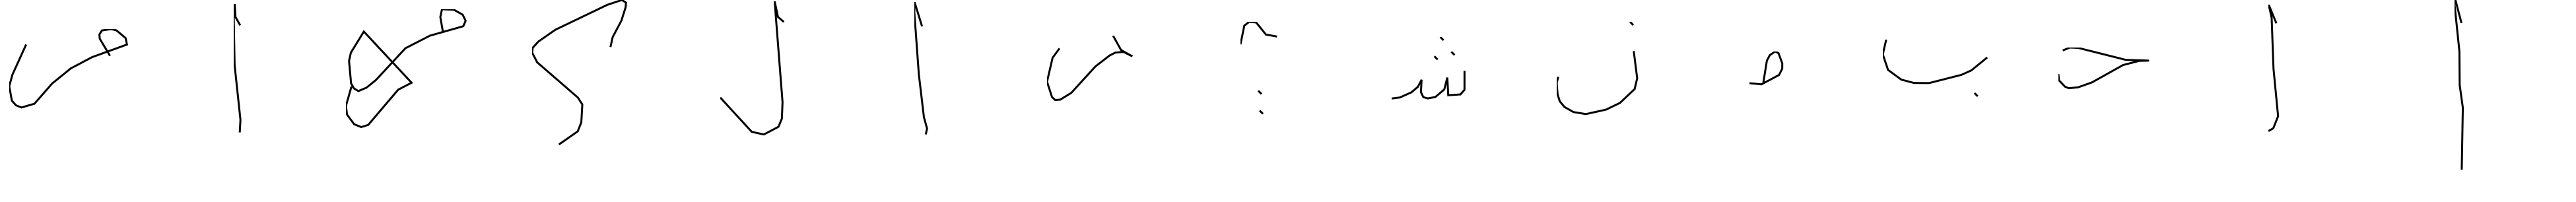

In [24]:
print(file)
char_drawings = generate_characters(file)
images = []
for i, comp in enumerate(char_drawings):
    char, drawing = list(comp.items())[0]
    images.append(draw_strokes(convert_3d(drawing, threshold=10000), square = True))
concatenate(images, mode='h')

In [28]:
word_drawings = defaultdict(lambda  :[]) 
npy_files = glob.glob('server/larger_data/*')

word_drawings = defaultdict(lambda  :[]) 

for file in npy_files:
    drawings = generate_words(file)
    for i, comp in enumerate(drawings):
        word, drawing = list(comp.items())[0]
        img, res = draw_strokes(convert_3d(drawing), square = True, return_res = True, stroke_width = 5)
        if res[0] > 100 and res[1] > 100:
            word_drawings[word].append(img)

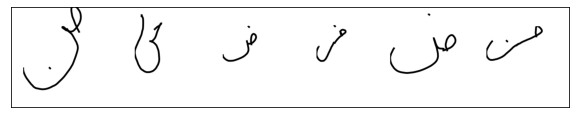

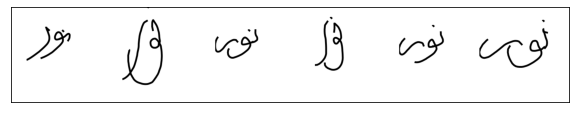

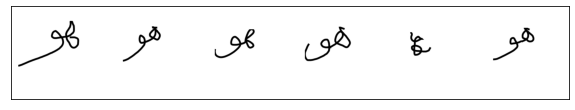

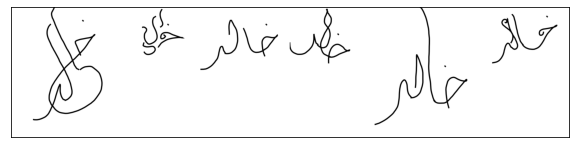

In [140]:
import random 
cnt = 0 
for word in ['من', 'نور', 'هو', 'خالد']:
    if len(word_drawings[word]) > 6:
        plt.figure(figsize = (10,10))
        plt.imshow(concatenate(random.sample(word_drawings[word],  6)))
        plt.xticks([])
        plt.yticks([])
        plt.show()
        cnt += 1
    if cnt >= 5:
        break

In [79]:
npy_files = glob.glob('server/larger_data/*')

char_drawings = defaultdict(lambda  :[]) 

for file in npy_files:
    drawings = generate_characters(file)
    images = []
    for i, comp in enumerate(drawings):
        char, drawing = list(comp.items())[0]
        img, res = draw_strokes(convert_3d(drawing, threshold=1000), square = True, return_res = True, stroke_width = 5)
        if res[0] > 100 and res[1] > 100:
            char_drawings[char].append(img)

KeyboardInterrupt: 

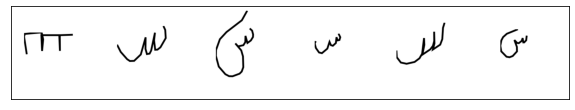

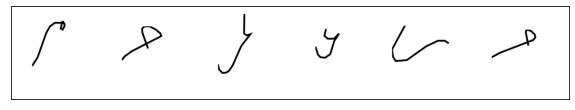

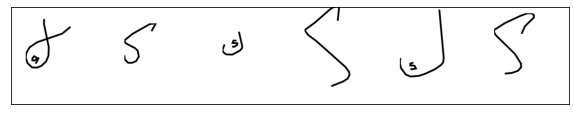

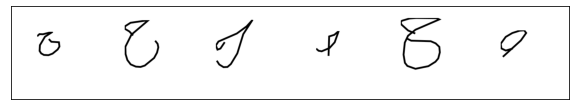

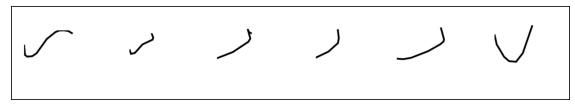

In [61]:
import random 
cnt = 0 
for char in ['س', 'م', 'ك', 'ح', 'ر']:
    if len(char_drawings[char]) >= 6:
        plt.figure(figsize = (10,10))
        plt.imshow(concatenate(random.sample(char_drawings[char],  6)))
        plt.xticks([])
        plt.yticks([])
        plt.show()
        cnt += 1
    if cnt >= 5:
        break

In [225]:
imgs = []
for char in char_drawings:
    img = concatenate(char_drawings[char][:20],)
    imgs.append(img)

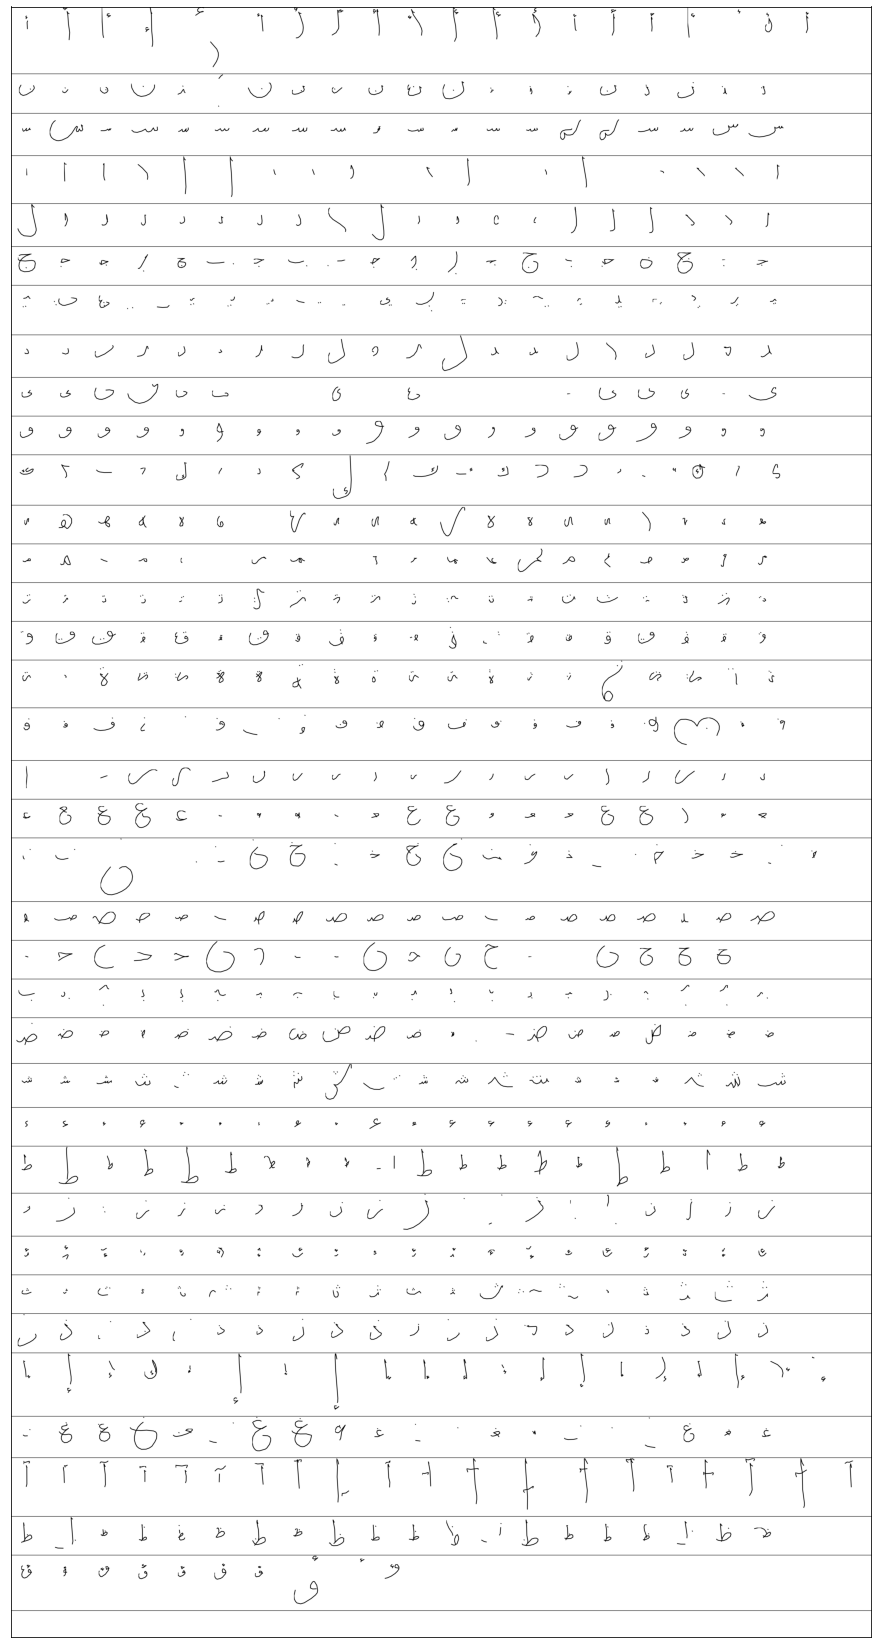

In [226]:
plt.figure(figsize = (40,30))
plt.xticks([])
plt.yticks([])
plt.imshow(concatenate(imgs,'v',margin=5))

In [28]:
list(char_drawings.keys())[-1]

'ء'

In [147]:
npy_files = glob.glob('server/larger_data/*')

images = []
for file in npy_files:
    if 'بسم الله الرحمن الرحيم' in file:
        drawing = json.load(open(file))
        img, res = draw_strokes(convert_3d(drawing), square = True, return_res = True, stroke_width = 5)
        images.append(img)

In [148]:
def map_axes(i, num_sketches = 16):
    sqrt = int(math.sqrt(num_sketches))
    x = np.array(list(range(num_sketches))).reshape((sqrt, sqrt)) 
    dim1, dim2 = np.where(x == i)
    return (int(dim1), int(dim2))

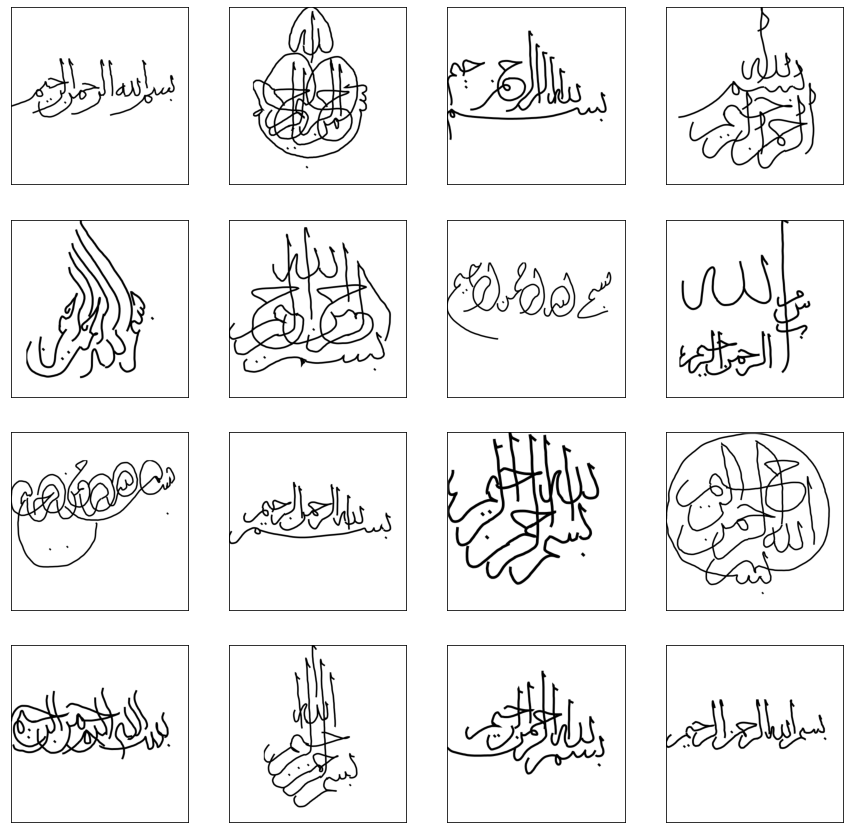

In [149]:
fig, axes = plt.subplots(4, 4, figsize=(15,15))
indices = [0, 1, 17, 3, 4, 5, 6, 7, 8 , 9, 10, 11, 12 , 13, 14, 15]
for i, j in enumerate(indices):
    ax = axes[map_axes(i, num_sketches = 16)]
    ax.imshow(images[j])
    ax.set_xticks([])
    ax.set_yticks([])

In [36]:
import pprint

drawing = json.load(open('server/larger_data/22خالد.json'))
drawing = apply_rdb(drawing)
for stroke in drawing:
    pprint.pprint(stroke)

{'.': [[332, 124]]}
{'ح': [[331, 150], [336, 149], [354, 169], [318, 169]]}
{'ا': [[321, 170], [315, 169], [308, 162], [303, 124]]}
{'ل': [[286, 119], [286, 157], [282, 163], [268, 163]]}
{'د': [[250, 144], [260, 156], [264, 172], [259, 176], [244, 176], [238, 171]]}


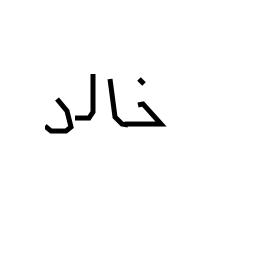

In [38]:
draw_strokes(convert_3d(drawing), square = True, return_res = True, stroke_width = 5)[0]

In [131]:
num_chars = 0 
num_words = 0 
num_strks = 0 
num_sents = 0 

for file in glob.glob('server/larger_data/*')+glob.glob('server/data/*'):
    text = re.sub('[0-9]', '', file.split('/')[-1][:-5])
    for char in text:
        if char in map_chars:
            num_strks += len(map_chars[char])
        else:
            num_strks += 1
            
    num_chars += len(text.replace(' ', ''))
    num_words += len(text.split(' '))
    num_sents += 1

print('number of words ', num_words)
print('number of characters ', num_chars)
print('number of strokes ', num_strks)
print('number of sentences', num_sents)

number of words  3026
number of characters  16777
number of strokes  24861
number of sentences 1414


In [309]:
import os
for file in wrong_annotations:
    file_name = file.split('/')[-1][:-5]
    try:
        os.remove(file)  
        shutil.move(f'server/static/processed_larger_images/{file_name}.jpg', f'server/static/larger_images/{file_name}.jpg')
    except:
        print('already removed')

already removed
